**FINAL EXAMINATION:**

**COGNATE/ELECTIVE 3**

***GROUP 13***


*   AGONCILLO, ROYET L.
*   ATIENZA, KURT CYDRICK A.
*   ROBLES, DANIELLA L.
*   SANCHEZ, KYLHA A.

# **Project Title: &quot;Design and Evaluate a Custom Deep Learning Model&quot;**

**1. Choosing a Dataset**

**Twitter Sentiment Analysis Dataset**

**Source:** *Twitter Sentiment Dataset on Kaggle*

link: *https://www.kaggle.com/datasets/saurabhshahane/twitter-sentiment-dataset*

**Content:** *This dataset contains tweets labeled with sentiment. Each tweet is either classified as positive or negative, which makes it ideal for binary sentiment classification.*

**Domain:** *Text Classification*

**About the Dataset:**
The Twitter Sentiment Analysis Dataset is a widely used dataset in the field of natural language processing and sentiment analysis. It consists of a collection of tweets, each labeled with the sentiment expressed in the tweet, which can be positive, negative, or neutral. This dataset is commonly used for training and evaluating machine learning models that aim to automatically analyze and classify the sentiment behind Twitter messages.

The dataset contains a diverse range of tweets, capturing the opinions, emotions, and attitudes of Twitter users on various topics such as movies, products, events, or general daily experiences. The tweets cover a broad spectrum of sentiments, including expressions of joy, satisfaction, anger, disappointment, sarcasm, or indifference.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
import string


In [ ]:
import kagglehub

# Download dataset
path = kagglehub.dataset_download("saurabhshahane/twitter-sentiment-dataset")

import os
file_path = os.path.join(path, "Twitter_Data.csv")
data = pd.read_csv(file_path)

# Preview the data
print(data.head())
print(data.info())


                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None


**2. Defining the Problem Statement**

**"Classifying the sentiment of tweets as positive or negative based on their content using a deep learning model."**

The task is to predict the sentiment of tweets, categorizing them into either positive or negative. This can be used for understanding public sentiment toward a particular subject, brand, or event based on Twitter data

**3. Designing the Model**

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('wordnet')

# Define text cleaning function
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    if isinstance(text, str):
        text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
        text = text.lower()  # Convert to lowercase
        tokens = nltk.word_tokenize(text)  # Tokenize
        tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
        tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
        return ' '.join(tokens)  # Rejoin tokens into a single string
    return ''

# Apply text cleaning
data['text_cleaned'] = data['clean_text'].apply(clean_text)
print(data[['clean_text', 'text_cleaned']].head())


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          clean_text  \
0  when modi promised “minimum government maximum...   
1  talk all the nonsense and continue all the dra...   
2  what did just say vote for modi  welcome bjp t...   
3  asking his supporters prefix chowkidar their n...   
4  answer who among these the most powerful world...   

                                        text_cleaned  
0  modi promised “ minimum government maximum gov...  
1             talk nonsense continue drama vote modi  
2  say vote modi welcome bjp told rahul main camp...  
3  asking supporter prefix chowkidar name modi gr...  
4  answer among powerful world leader today trump...  


In [ ]:
# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)  # Limit features to reduce memory usage
X = vectorizer.fit_transform(data['text_cleaned']).toarray()

# Encode labels as integers
y = pd.Categorical(data['category']).codes


**4. Training and Testing the Model:**

In [ ]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert labels to one-hot encoded format
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)


In [ ]:
# Build the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with shape
    Dense(128, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(y_train_encoded.shape[1], activation='softmax')  # Output layer matches # of classes
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Train the model
history = model.fit(X_train, y_train_encoded,
                    epochs=10,
                    batch_size=16,  # Use smaller batch size
                    validation_data=(X_test, y_test_encoded))


Epoch 1/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 48s 6ms/step - accuracy: 0.5581 - loss: 1.1161 - val_accuracy: 0.6547 - val_loss: 0.9354
Epoch 2/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 78s 5ms/step - accuracy: 0.6613 - loss: 0.9316 - val_accuracy: 0.7686 - val_loss: 0.8394
Epoch 3/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.7381 - loss: 0.8748 - val_accuracy: 0.7783 - val_loss: 0.8012
Epoch 4/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 82s 5ms/step - accuracy: 0.7480 - loss: 0.8528 - val_accuracy: 0.7902 - val_loss: 0.7768
Epoch 5/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 83s 6ms/step - accuracy: 0.7507 - loss: 0.8420 - val_accuracy: 0.7914 - val_loss: 0.7682
Epoch 6/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 79s 5ms/step - accuracy: 0.7547 - loss: 0.8292 - val_accuracy: 0.7888 - val_loss: 0.7779
Epoch 7/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - accuracy: 0.7548 - loss: 0.8293 - val_accuracy: 0.7893 - val_loss: 0.7672
Epoch 8/10
8149/8149 ━━━━━━━━━━━━━━━━━━━━ 46s 6ms/step - accuracy: 0.7558 - loss: 0

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict and convert predictions to class labels
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_labels = np.argmax(y_test_encoded, axis=1)

# Print evaluation metrics
print(classification_report(y_test_labels, y_pred_labels))
print(confusion_matrix(y_test_labels, y_pred_labels))


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
              precision    recall  f1-score   support

           0       0.82      0.57      0.67      7179
           1       0.79      0.76      0.77     11034
           2       0.74      0.87      0.80     14383

    accuracy                           0.77     32596
   macro avg       0.78      0.73      0.75     32596
weighted avg       0.77      0.77      0.76     32596

[[ 4117   969  2093]
 [  310  8379  2345]
 [  611  1244 12528]]


5. Analyzation of Results

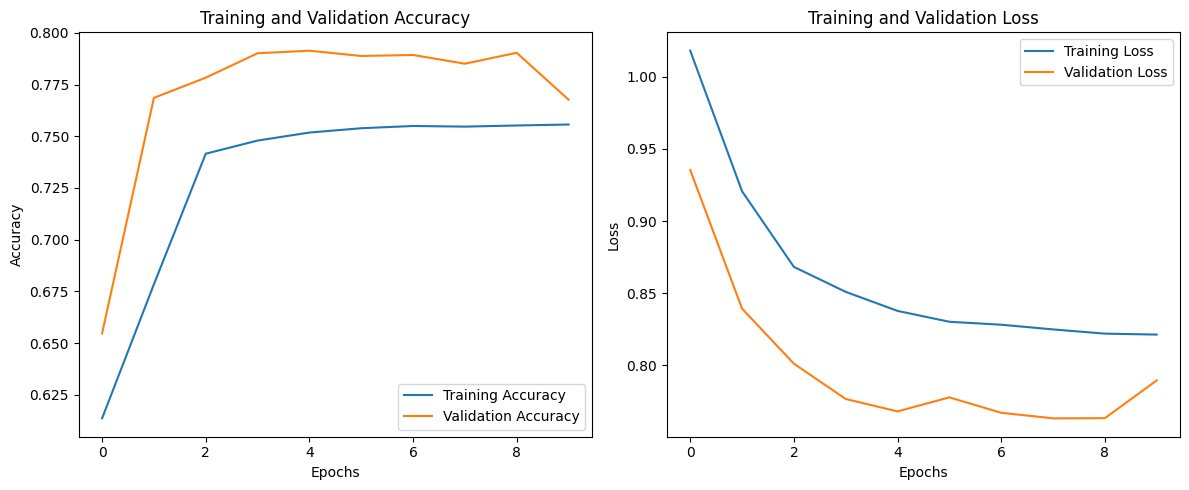

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()


1019/1019 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step


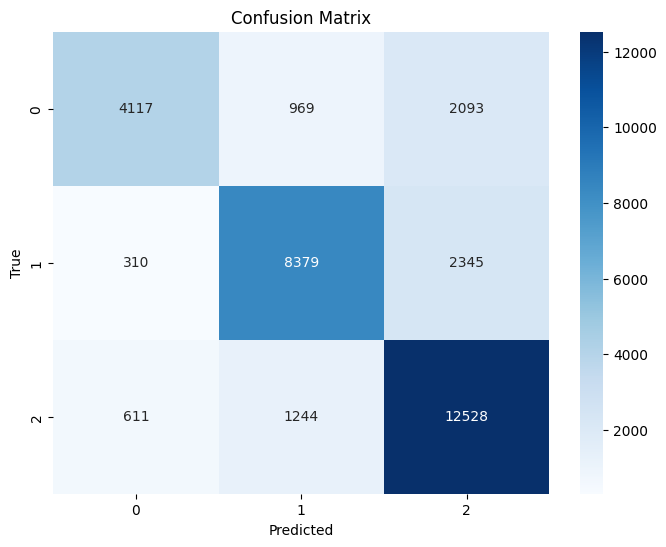

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.57      0.67      7179
           1       0.79      0.76      0.77     11034
           2       0.74      0.87      0.80     14383

    accuracy                           0.77     32596
   macro avg       0.78      0.73      0.75     32596
weighted avg       0.77      0.77      0.76     32596



In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Get the predicted classes
y_pred_classes = np.argmax(model.predict(X_test), axis=1)
y_test_classes = np.argmax(y_test_encoded, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)

# Define labels (assuming you have 3 classes: 0, 1, 2)
labels = [0, 1, 2]  # Replace with your actual class labels if different

# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print("Classification Report:")
print(classification_report(y_test_classes, y_pred_classes, target_names=[str(label) for label in labels]))

In [ ]:
# prompt: add a code for testine some Twitter sentiments

import numpy as np
# Example of testing a few custom tweets
custom_tweets = [
    "This is a great day!",
    "I am very unhappy with this service.",
    "Neutral tweet."
]

# Clean the custom tweets
custom_tweets_cleaned = [clean_text(tweet) for tweet in custom_tweets]

# Vectorize the custom tweets using the same vectorizer used for training
X_custom = vectorizer.transform(custom_tweets_cleaned).toarray()

# Predict sentiment for custom tweets
custom_predictions = model.predict(X_custom)

# Convert predictions to class labels
# the classes are 0, 1, 2 for negative, neutral, positive respectively
predicted_classes = np.argmax(custom_predictions, axis=1)

# Map class indices back to sentiment labels
sentiment_map = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
predicted_sentiments = [sentiment_map[pred] for pred in predicted_classes]

# Print the custom tweets and their predicted sentiments
for tweet, sentiment in zip(custom_tweets, predicted_sentiments):
    print(f"Tweet: '{tweet}' -> Predicted Sentiment: {sentiment}")

To improve the model’s performance, we propose the following enhancements:


*   Regularization Techniques: Adding dropout layers or L2 regularization to prevent overfitting.
*   Data Augmentation: Applying transformations like rotation, flipping, and zooming to increase dataset diversity.
*   Hyperparameter Tuning: Experimenting with different learning rates, batch sizes, and optimizers.
*   Transfer Learning: Leveraging pre-trained models such as VGG16 or ResNet, which are already trained on large datasets and can provide a better starting point for classification.
*   Class Balancing: If dataset imbalance is an issue, oversampling minority classes or undersampling majority classes could help.













This project wasn’t without its challenges.

Challenge 1: Overfitting, as evident from the divergence in training and validation accuracy.

Solution: We suggest regularization and data augmentation to address this.

Challenge 2: Class misclassification in the confusion matrix.

Solution: Exploring advanced models like transfer learning or increasing the dataset’s size with augmentation could improve class separation.

Challenge 3: Dataset preparation, especially ensuring that the dataset was properly labeled and balanced.

Solution: Thorough validation of the dataset before training helped mitigate labeling issues.


-Neutral vs. Positive Confusion: Neutral tweets are often misclassified as Positive, indicating that the features used may lack sufficient granularity to distinguish moderately positive from neutral sentiments.

-Negative vs. Positive Confusion: The high number of Negative tweets misclassified as Positive suggests additional preprocessing (e.g., identifying strong negative keywords or phrases) may help improve performance.

-Class Imbalance: If one class (e.g., Positive) has significantly more samples than others, this imbalance could lead to the model being biased toward the larger class.

To conclude:
This project successfully demonstrated how to design, train, and evaluate a custom deep learning model for sentiment analysis.

Our model achieved a validation accuracy of 77.5% and provided valuable insights into its strengths and weaknesses.
The visualizations, including accuracy and loss plots and the confusion matrix, highlighted areas for improvement.
This experience deepened our understanding of deep learning concepts, including model design, optimization, and evaluation.
With further improvements, this model could be applied to other real-world classification problems, demonstrating the power of AI in automating complex tasks.